In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Read the datasets from the CSV files
x_train = pd.read_csv("data_split/X_resampled_train.csv").drop(columns=['Encoded_City'])
y_train = pd.read_csv('data_split/y_resampled_train.csv').iloc[:, 0]

x_valid = pd.read_csv('data_split/X_val.csv').drop(columns=['Encoded_City'])
y_valid = pd.read_csv('data_split/y_val.csv').iloc[:, 0]


x_test = pd.read_csv('data_split/X_test.csv').drop(columns=['Encoded_City'])
y_test = pd.read_csv('data_split/y_test.csv').iloc[:, 0]

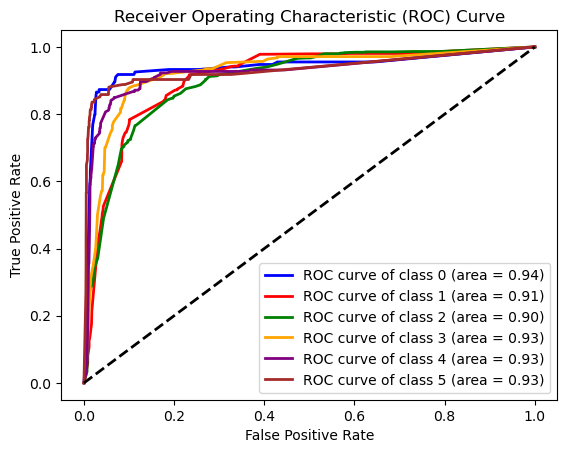

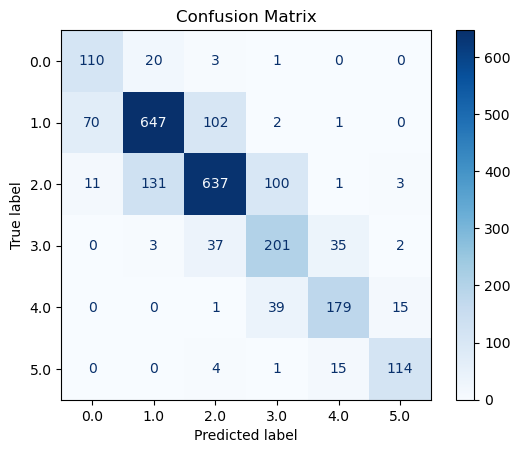

Training Accuracy: 0.8454386710085422
Validation Accuracy: 0.7529175050301811
Test Accuracy: 0.7597585513078471
Precision: 0.7711603796868783
Recall: 0.7597585513078471
F1 Score: 0.7624693460321872
Cohen's Kappa: 0.6796695092841203
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.82      0.68       134
         1.0       0.81      0.79      0.80       822
         2.0       0.81      0.72      0.76       883
         3.0       0.58      0.72      0.65       278
         4.0       0.77      0.76      0.77       234
         5.0       0.85      0.85      0.85       134

    accuracy                           0.76      2485
   macro avg       0.73      0.78      0.75      2485
weighted avg       0.77      0.76      0.76      2485

ROC AUC Score: {0: 0.9404905502263248, 1: 0.9072210208023535, 2: 0.8988191431152736, 3: 0.9250814119886691, 4: 0.9250346854298325, 5: 0.9337150910695353}
Test Accuracy with Loaded Model: 0.7597585513078

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_curve,recall_score,auc, f1_score, classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

n_classes_=6
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10, 20]
}


dtree = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
model = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

model.fit(x_train, y_train)

# Predictions on training and validation sets
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)
y_test_pred = model.predict(x_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# ROC AUC Score
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_test_pred), multi_class='ovr')


# Plot ROC curve
y_valid_pred_proba = model.predict_proba(x_valid)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_valid_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown'] 
for i, color in zip(range(n_classes_), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {valid_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Cohen\'s Kappa: {kappa}')
print(f'Classification Report:\n{classification_rep}')
print(f'ROC AUC Score: {roc_auc}')

# Save the model
joblib.dump(model, 'decision_tree_model.joblib')

# Load the saved model and test accuracy on the test set
loaded_model = joblib.load('decision_tree_model.joblib')
y_test_pred_loaded = loaded_model.predict(x_test)
test_accuracy_loaded = accuracy_score(y_test, y_test_pred_loaded)

print(f'Test Accuracy with Loaded Model: {test_accuracy_loaded}')
